# Time Series data generation

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Equation of a wave: y(x,t) = a * sin (ω*x + φ) 

a = amplitude of the wave (min max values)

ω = angular frequency (how many cycles occur in a second)

x = number of points

φ = phase of the signal (where do we start)

In [83]:
sample=1000
noise = 0.04*np.random.rand(sample)
noise2 = 300*np.random.rand(sample)
def timeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def timeseriesPeak(timeseries,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peak = np.sin(0.001*x)*300
    peak += np.random.rand(1000)
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseries+peak, peak


def timeseriesDec(amplitude,frequency,phase,x,slope):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65 :
        for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)+noise2
    else:
         for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)
        
    return y

def timeseriesPeakDec(timeseriesDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peakDec = np.sin(0.01*x)*200+500*x
    peakDec += np.random.rand(1000)
    
    peakDec[x<start]=0
    peakDec[x>end]=0
    
    return timeseriesDec+peakDec, peakDec

def updwntimeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def updwntimeseriesPeak(timeseriesPeakDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peak = np.sin(0.001*x)*60
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseriesPeakDec+peak, peak

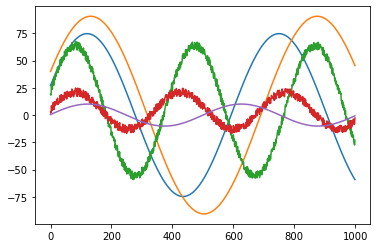

In [119]:
# vectors for w phase and amplitude regular shape
# these arrrays contain 200 random values between (0,1) and we multiply the w by 0.02 to
# ensure cycles in the time series 
p1 = np.random.rand(200)
a1 = np.random.rand(200)
w1 = np.ones(200)*0.02

x = np.arange(start=0, stop=(1000))
peak=np.zeros(1000)
# We will create 200 time series, we will multiply the w phase and amplitude
# to obtain different results
yValues = []
peak = np.zeros(1000)
for i in range(1,200):
    rand_w = np.random.uniform(0.3,1)
    rand = np.random.uniform(0,1)
    y=timeseries(a1*rand,w1*rand_w,p1*rand,x)
    yValues.append((y,peak))
    if i <= 5:
        plt.plot(x,y)


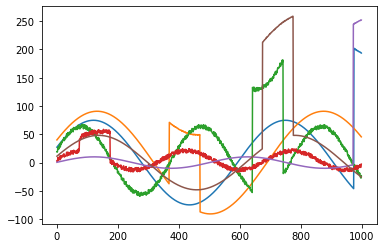

In [120]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValues)):
    y, peak = timeseriesPeak(yValues[i][0],x)
    ySpikes.append((y,peak))
    if i <= 5:
        plt.plot(x,y)
      

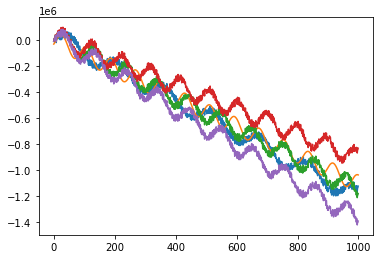

In [121]:
p2 = np.random.rand(200)
a2 = np.random.randint(100,600,200)
w2 = np.ones(200)

b = np.ones(200)

x = np.arange(start=0, stop=(1000))
yValuesDec = []
for i in range(1,200):
    rand_w = np.random.uniform(0.02,0.1)
    rand = np.random.uniform(1,10)
    y = timeseriesDec(a2,w2*rand_w,p2,x,b*rand)
    yValuesDec.append(y)
    if i <= 5:
        plt.plot(x,y)



#z = (np.sin(x*0.02-150)*400-4*x)+0.4*(10**15)


#plt.plot(x,z)


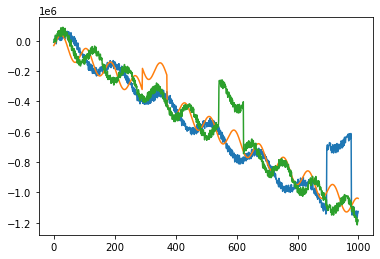

In [122]:
# We will create 200 time series with spikes
ySpikesDec = []
for i in range(0,len(yValuesDec)):
    y, peakDec = timeseriesPeakDec(yValuesDec[i],x)
    ySpikesDec.append((y,peakDec))
    if i <= 2:
        plt.plot(x,y)

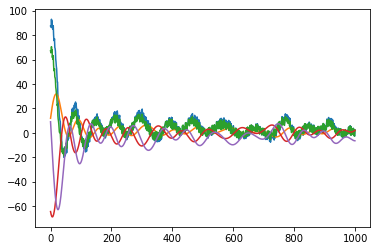

In [123]:
w3 = np.random.rand(200)*0.1#+0.1
p3 = np.random.rand(200)
a3 = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

yValuesupdwn = []
for i in range(1,200):
  randa = np.random.uniform(1,10)
  randp = np.random.uniform(1,20)
  y = updwntimeseries(a3*randa,w3,p3+randp,x)
  yValuesupdwn.append(y)
  if i <= 5:
      plt.plot(x,y)


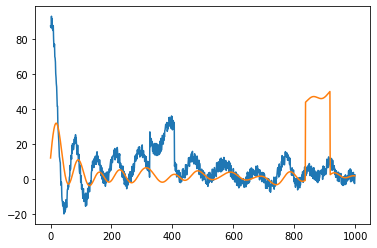

In [125]:
ySpikesupdwn = []
for i in range(0,len(yValuesupdwn)):
    y, peakupdwn = updwntimeseriesPeak(yValuesupdwn[i],x)
    ySpikesupdwn.append((y,peakupdwn))
    if i <= 1:
        plt.plot(x,y)

In [126]:
def timeseries2Df(ts,peak):
  peak[peak > 0] = 1
  d = { 'value': ts , 'anomaly':peak}
  return pd.DataFrame(data=d)


In [143]:
data = yValues + ySpikes + ySpikesDec + ySpikesupdwn

In [156]:
def timeseries2Df(data):
    values = []
    peaks = []
    for i in range(len(data)):
        peak = [1 if x > 0 else 0 for x in data[i][1]]
        values.append(data[i][0])
        peaks.append(data[i][1])
    val_flat = [item for sub_list in values for item in sub_list]
    peak_flat = [item for sub_list in peaks for item in sub_list]
    d = { 'value': val_flat , 'anomaly':peak_flat}
    return pd.DataFrame(data=d)

In [157]:
df = timeseries2Df(data)
df

,value,anomaly
0,27.213313,0.0
1,27.906428,0.0
2,28.596765,0.0
3,29.284257,0.0
4,29.968834,0.0
...,...,...
795995,-0.835728,0.0
795996,-0.891752,0.0
795997,-0.950735,0.0
795998,-1.012262,0.0


In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['value'] = scaler.fit_transform(np.array(df["value"]).reshape(-1, 1))
df

,value,anomaly
0,0.875980,0.0
1,0.875980,0.0
2,0.875980,0.0
3,0.875981,0.0
4,0.875981,0.0
...,...,...
795995,0.875968,0.0
795996,0.875968,0.0
795997,0.875968,0.0
795998,0.875968,0.0


In [ ]:
!pip install tensorflow

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

In [170]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model

input_layer = Input(shape=(796000, 2))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 796000, 2)]       0         
                                                                 
 conv1d (Conv1D)             (None, 796000, 32)        544       
                                                                 
 lstm (LSTM)                 (None, 796000, 32)        8320      
                                                                 
 dense (Dense)               (None, 796000, 1)         33        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [37]:
df_val = df[["val","valS","decvals","udval"]]
df_ano = df[["valspike","decspike","udspikes"]]

KeyError: "None of [Index(['val', 'valS', 'decvals', 'udval'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_val.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=["val","valS","decvals","udval"])
df_scaled

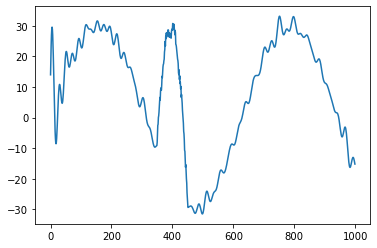

In [30]:
randcomp = 200

w_rand_ampl=0.2
w_rand_offs=0.1

w = np.random.rand(200)*0.2+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y += np.sin(w[i]*x+p[i])*a[i]

peak = -0.02*(x-400)**2+50
peak += np.random.rand(1000)*3
peak[x<350]=0
peak[x>450]=0
#plt.plot(x,peak)
plt.plot(x,y+peak+np.sin(0.01*x)*30)



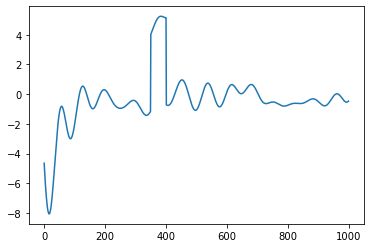

In [31]:
w = np.random.rand(200)*0.1#+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y -= np.sin(w[i]*x+p[i])*a[i]
  

#peak = 0.01*(x-100)
peak = np.sin(0.001*x)*15
peak[x<350]=0
peak[x>400]=0
plt.plot(x,y+peak)

476
576


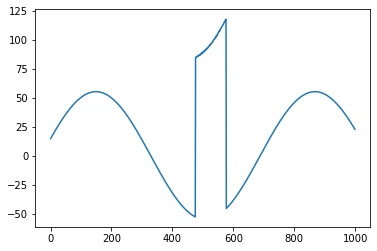

In [32]:
start = np.random.randint(900)
end = start+100
print(start)
print(end)

peak = np.sin(0.001*x)*300
peak += np.random.rand(1000)
peak[x<start]=0
peak[x>end]=0
plt.plot(x,yValues[25]+peak)
#plt.plot(x,peak)